# Trabajo final

**Integrantes**\
Karol Vanessa Cuello Ribón \
Jesús Ricardo Gandica \
Sara Sofia Quintero Vanegas \

### Referencia de los datos usados.
Nash, W., Sellers, T., Talbot, S., Cawthorn, A., & Ford, W. (1994). Abalone [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C55C7W.

# Funciones previas

In [1]:
def com(x,y):
  if len(x) != len(y):
    return("Error: Ingrese vectores de la misma longitud.")
  return np.median((x - np.median(x))*(y - np.median(y)))

def com_matriz(X):
  if len(X.shape) != 2:
    raise ValueError("X debe ser un array 2D.")

  # Calcula la matriz de covarianza robusta
  medians = np.median(X, axis=0)
  com_matriz = np.zeros((X.shape[1], X.shape[1]))

  for i in range(X.shape[1]):
    for j in range(X.shape[1]):
      # Comediana de la covarianza entre las columnas i y j
      com_matriz[i, j] = np.median((X[:, i] - medians[i]) * (X[:, j] - medians[j]))

  return com_matriz

def ecdf(x):
  x = sorted(x)
  ecdf = []
  n = len(x)
  for i in range(n):
      ecdf.append(i/n)
  return x, ecdf

# Tratamiento de datos previo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, BSpline
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [5]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [6]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


# 3) Regresión con una sola variable predictora.
Para este punto solo considere una sola variable predictora, es decir:
𝑦 = 1.20 + 9.76 ∗ 𝑥1 + 𝜀,    𝑑𝑜𝑛𝑑𝑒   𝜀~𝑖𝑖𝑑 𝑁(0, 2)
y siga la metodología de contaminación al 9% para la prueba del algoritmo. Implemente usando
algún paquete un suavizado del tipo spline

### Generación de los Datos (Simulación)

In [7]:
# Generación de los datos originales
n = 500
x1 = np.random.normal(loc=1, scale=1, size=n)
e = np.random.normal(loc=0, scale=np.sqrt(2), size=n)
y3 = 1.20 + 9.76 * x1 + e

### Aplicación del Suavizado Tipo Spline
Técnica de regresión no paramétrica que busca encontrar una curva suave que se ajuste los datos

### Prueba del Algoritmo
La idea de realizar la prueba del algoritmo es verificar cómo el suavizado spline se comporta ante los datos contaminados comparado con los datos originales. Esto implica ajustar nuevamente el suavizado a los datos contaminados (y3\_cont) y observar si el ajuste es razonable o cómo cambia la curva de suavizado con respecto al modelo original.
Luego puedes comparar visualmente las curvas obtenidas con y sin contaminación para evaluar cómo la contaminación afecta la calidad del ajuste.


*   Compare el rendimiento de cada uno de los algoritmos usando las  
simulaciones  y  los  resultados  obtenidas  de  estas simulaciones. Para  la  comparación  use  el  promedio  de  los  errores  cuadráticos (MSE) y la  media  de  los  errores  absolutos  (MAE).






In [8]:
from scipy.interpolate import UnivariateSpline

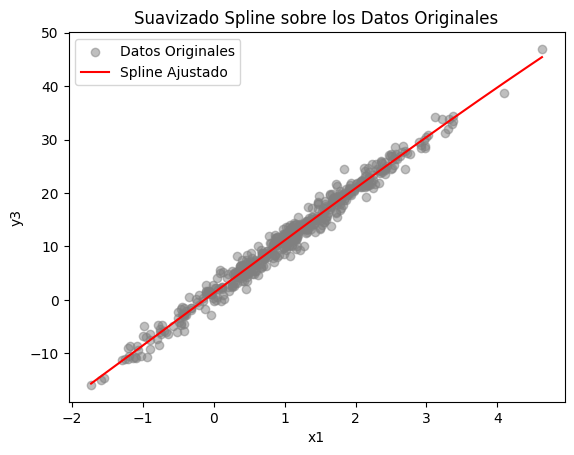

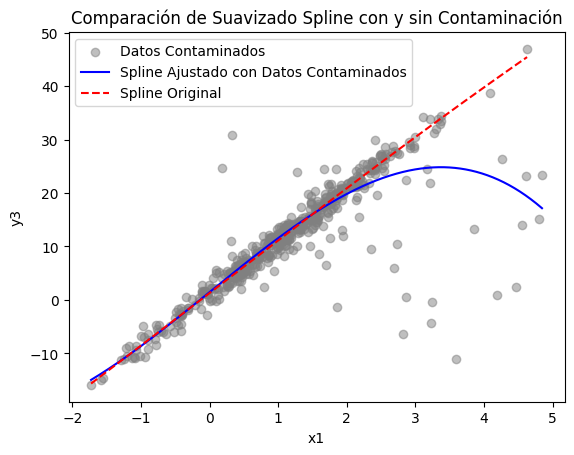

In [62]:
# Generación de los datos originales
n = 500
x1 = np.random.normal(loc=1, scale=1, size=n)
e = np.random.normal(loc=0, scale=np.sqrt(2), size=n)
y3 = 1.20 + 9.76 * x1 + e

# Ordenar los datos originales para suavizar adecuadamente
sorted_indices = np.argsort(x1)
x1_sorted = x1[sorted_indices]
y3_sorted = y3[sorted_indices]

# Ajuste Spline de Suavizado sobre los Datos Originales
spline = UnivariateSpline(x1_sorted, y3_sorted, s=991)

# Graficar los puntos originales y el spline ajustado
x_plot = np.linspace(min(x1_sorted), max(x1_sorted), 1000)  # Valores para graficar spline de manera suave
plt.figure()
plt.scatter(x1, y3, color='gray', alpha=0.5, label='Datos Originales')  # Datos originales
plt.plot(x_plot, spline(x_plot), color='red', label='Spline Ajustado')  # Spline ajustado
plt.xlabel('x1')
plt.ylabel('y3')
plt.legend()
plt.title('Suavizado Spline sobre los Datos Originales')
plt.show()

# Contaminación del 9% de los datos
porcentaje = 0.09
n_cont = int(n * porcentaje)
contamination = np.random.normal(loc=2.2, scale=np.sqrt(1.5), size=n)
indices = random.sample(range(n), n_cont)
x1c = np.array(x1)  # Copia de x1 para no modificar los datos originales
x1c[indices] = contamination[indices]

# Generar y contaminado
y3_cont = 1.20 + 9.76 * x1 + e

# Ordenar los datos contaminados para suavizar adecuadamente
sorted_indices_cont = np.argsort(x1c)
x1c_sorted = x1c[sorted_indices_cont]
y3_cont_sorted = y3_cont[sorted_indices_cont]

# Ajuste Spline de Suavizado sobre los Datos Contaminados
spline_cont = UnivariateSpline(x1c_sorted, y3_cont_sorted, s=12100)

plt.figure()
xplotcont = np.linspace(min(x1c_sorted), max(x1c_sorted), 1000)
plt.scatter(x1c, y3_cont, color='gray', alpha=0.5, label='Datos Contaminados')  # Datos contaminados
plt.plot(xplotcont, spline_cont(xplotcont), color='blue', label='Spline Ajustado con Datos Contaminados')  # Spline con datos contaminados
plt.plot(x_plot, spline(x_plot), color='red', linestyle='--', label='Spline Original')  # Spline original para comparación
plt.xlabel('x1')
plt.ylabel('y3')
plt.legend()
plt.title('Comparación de Suavizado Spline con y sin Contaminación')
plt.xlim
plt.show()

Comparación de los Modelos con MSE y MAE

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y3_pred_original = spline(x1_sorted)  # Predicciones del spline ajustado a los datos originales
y3_pred_contaminado = spline_cont(x1c_sorted)  # Predicciones del spline ajustado a los datos contaminados

mse_original = mean_squared_error(y3_sorted, y3_pred_original)
mae_original = mean_absolute_error(y3_sorted, y3_pred_original)

mse_contaminado = mean_squared_error(y3_cont_sorted, y3_pred_contaminado)
mae_contaminado = mean_absolute_error(y3_cont_sorted, y3_pred_contaminado)

# Imprimir los resultados
print(f'MSE Original: {mse_original}')
print(f'MAE Original: {mae_original}')
print(f'MSE Contaminado: {mse_contaminado}')
print(f'MAE Contaminado: {mae_contaminado}')


MSE Original: 1.863522587071976
MAE Original: 1.0641832014802817
MSE Contaminado: 22.600449795020094
MAE Contaminado: 2.3603755175332446


### Ajuste al Conjunto de Datos "Abalone"
Veamos las correlaciones para elegir la variable más adecuada para predecir

In [11]:
def median(x):
  n = len(x)
  x = sorted(x)
  if n%2 != 0:
    return(x[(n-1)//2])
  else:
    return((x[(n//2)-1] + x[n//2])/2)

def sd(x):
  x_bar = sum(x)/len(x)
  return((sum((x-x_bar)**2)/(len(x)-1))**(1/2))

def MAD(x, k = (1/0.6745)):
  x_tilde = median(x)
  return(k * median(np.abs(x-x_tilde)))

def cov(x,y):
  x_bar = np.mean(x)
  y_bar = np.mean(y)
  return(sum((x-x_bar)*(y-y_bar))/(len(x)-1))

def com(x,y):
  if len(x) != len(y):
    return("Error: Ingrese vectores de la misma longitud.")
  return np.median((x - np.median(x))*(y - np.median(y)))

# def corr_pearson(x,y):
#   return cov(x,y)/(sd(x)*sd(y))

def corr_pearson(x, y):
    x = np.ravel(x)  # Asegúrate de que x sea un vector unidimensional
    y = np.ravel(y)
    return cov(x, y) / (sd(x) * sd(y))


#OBSERVACION
# def corr_com(x,y):
#   return (com(x,y)/(MAD(x, k= 1)*(MAD(y, k = 1))))

def corr_com(x, y):
    x = np.ravel(x)  # Asegúrate de que x sea un vector unidimensional
    y = np.ravel(y)

    mad_x = MAD(x, k=1)
    mad_y = MAD(y, k=1)

    # Evitar división por cero
    if mad_x == 0 or mad_y == 0:
        return np.nan

    return com(x, y) / (mad_x * mad_y)


def rank(x):
  x_sort = sorted(x)
  x_new = list(range(len(x)))
  for i in range(len(x)):
    #buscar i en x_sort y poner posicion del sort y número en x
    pos = x_sort.index(x[i]) + 1
    #l = [x[i], pos]
    #x_new[i] = l
    x_new[i] = pos
  return np.array(x_new)

def rho_spearman_alt(x,y):
  x_rank = rank(x)
  y_rank = rank(y)
  return corr_pearson(x_rank, y_rank)

def rho_spearman(x,y):
  d = rank(x) - rank(y)
  d2 = d**2
  sumd = sum(d2)

  rho_s = 1-(6*sumd)/(len(x)*(len(x)**2 - 1))
  return rho_s

def Kendall_tao(lx,ly):
  pares = [[x, y] for x, y in zip(lx, ly)]
  P_C = 0
  P_D = 0

  for i in range(0, len(pares)-1):
    for j in range(i+1, len(pares)):
      #print(pares[i], pares[j])
      x1 = pares[i][0]
      y1 = pares[i][1]
      x2 = pares[j][0]
      y2 = pares[j][1]

      if (x1 > x2 and y1 > y2) or (x1< x2 and y1 < y2):
        P_C += 1
      elif (x1 > x2 and y1 < y2) or (x1 < x2 and y1 > y2):
        P_D += 1
  n = len(pares)
  return (P_C - P_D)/(n*(n-1)/2)

In [12]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [13]:
onehot_sex = pd.get_dummies(X["Sex"])
onehot_sex = onehot_sex.astype(int)
X = pd.concat([X.drop("Sex", axis=1), onehot_sex], axis=1)


In [14]:
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [15]:
X_np = X.values
y_np = y.values

In [16]:
# Calcular las correlaciones de cada columna de X con y
n_features = X_np.shape[1]
correlations = {
    "Pearson": [],
    "Spearman": [],
    "Kendall": [],
    "Com": []
}

for i in range(n_features):
    x_column = X_np[:, i]

    pearson_corr = corr_pearson(x_column, y_np)
    correlations["Pearson"].append(pearson_corr)

    spearman_corr = rho_spearman(x_column, y_np)
    correlations["Spearman"].append(spearman_corr)

    kendall_corr = Kendall_tao(x_column, y_np)
    correlations["Kendall"].append(kendall_corr)

    com_corr = corr_com(x_column, y_np)
    correlations["Com"].append(com_corr)

correlations_df = pd.DataFrame(correlations, index=X.columns)
correlations_df

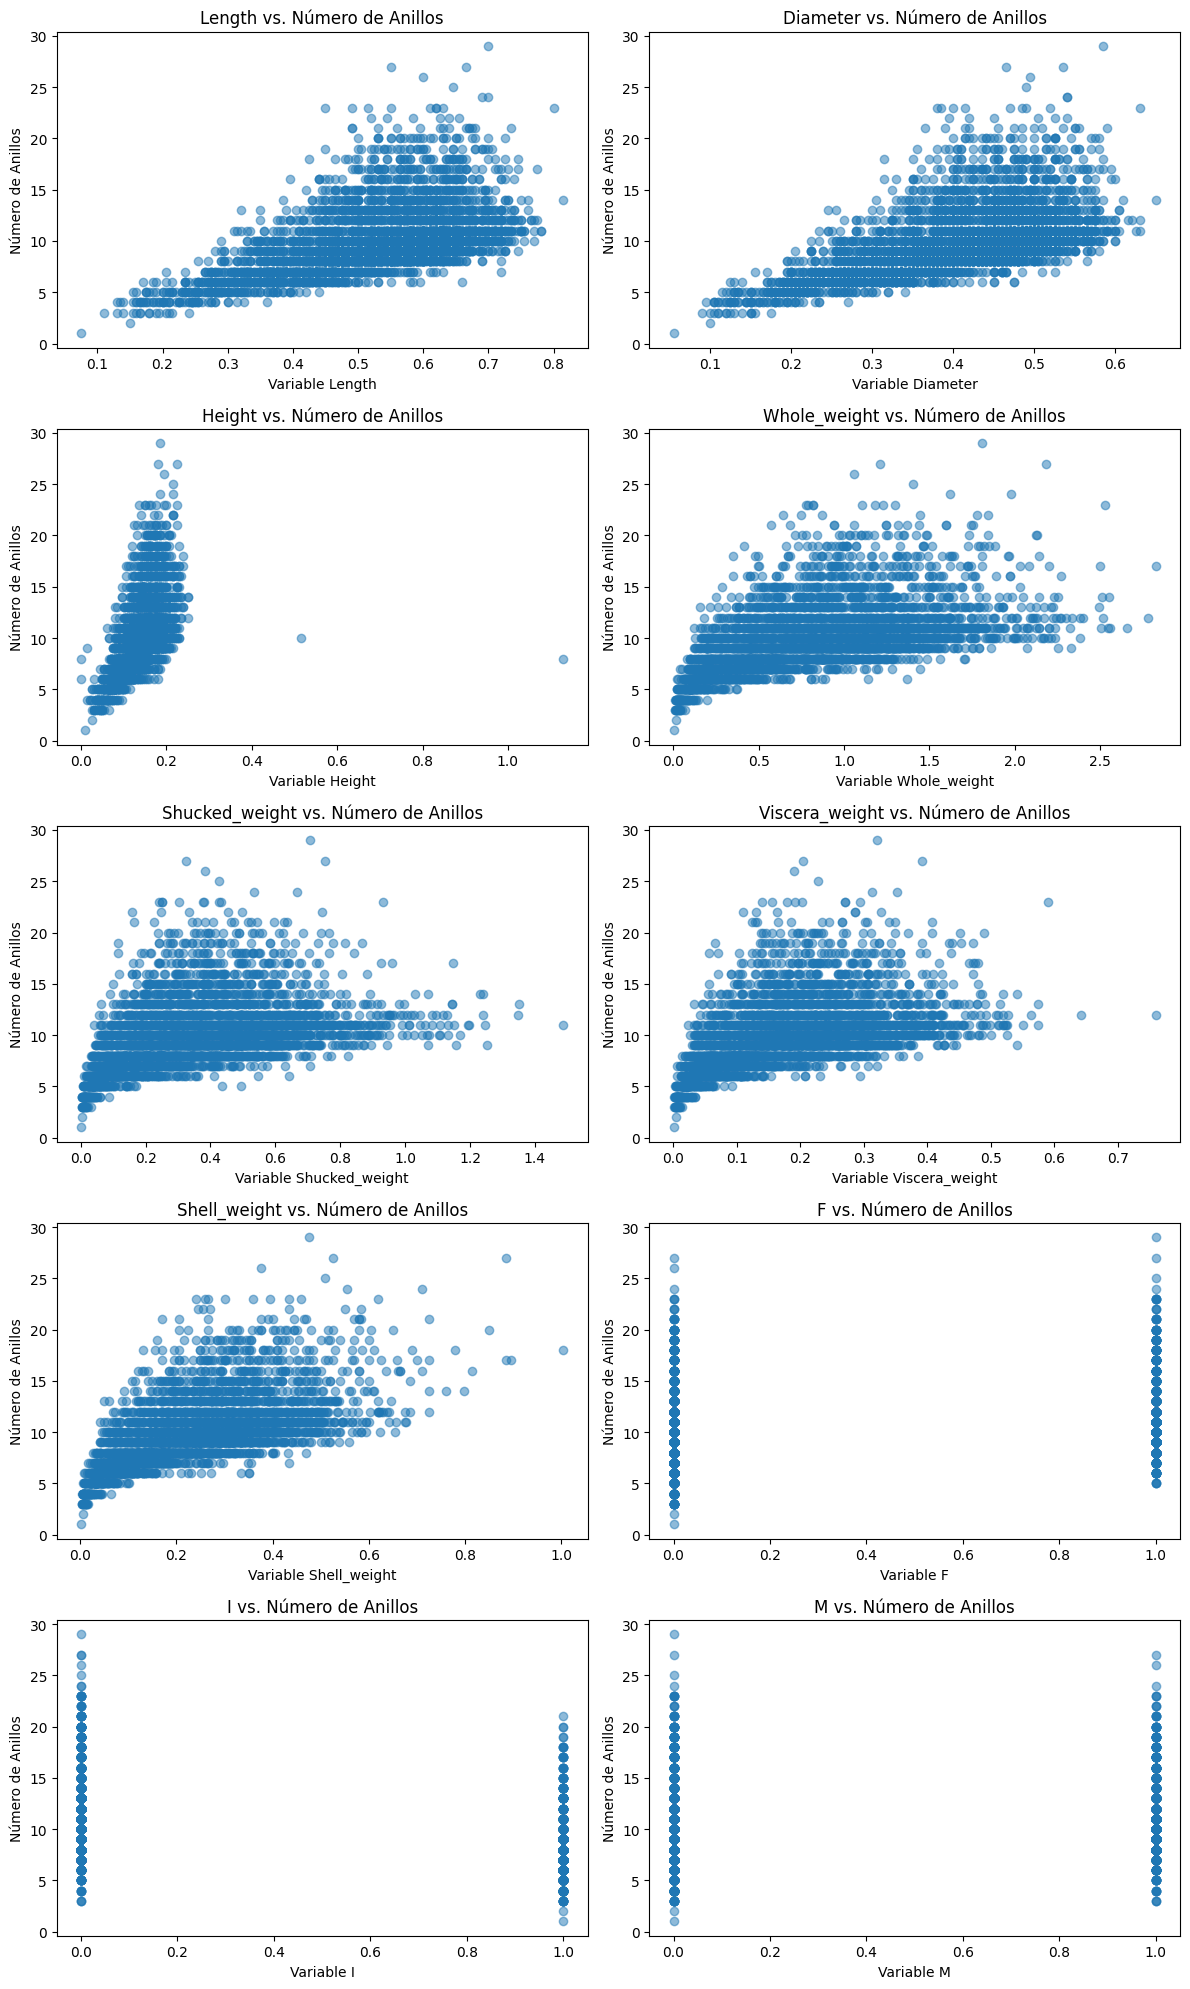

In [35]:
import matplotlib.pyplot as plt

# Definir cuántas filas y columnas tendrá la figura de subplots
n_features = X_np.shape[1]
n_rows = (n_features + 1) // 2  # Para tener dos gráficos por fila

fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))  # Crear subplots
axes = axes.flatten()  # Aplanar el array de ejes para iterar sobre él

# Iterar sobre cada característica y graficar en el subplot correspondiente
for i in range(n_features):
    x_column = X_np[:, i]
    axes[i].scatter(x_column, y_np, alpha=0.5)
    axes[i].set_xlabel(f'Variable {X.columns[i]}')
    axes[i].set_ylabel('Número de Anillos')
    axes[i].set_title(f'{X.columns[i]} vs. Número de Anillos')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


Podemos ver que para todas las métricas el valor más grande es Shell_weight, entonces para hacer el spline usaremos el y de los datos, es decir la edad y como x (la variable explicativa) shell weight

# Ajuste del Spline a los datos sin transformación

In [18]:
x1 = np.array(X['Shell_weight'])
x1.shape

(4177,)

In [19]:
y = np.array(y)

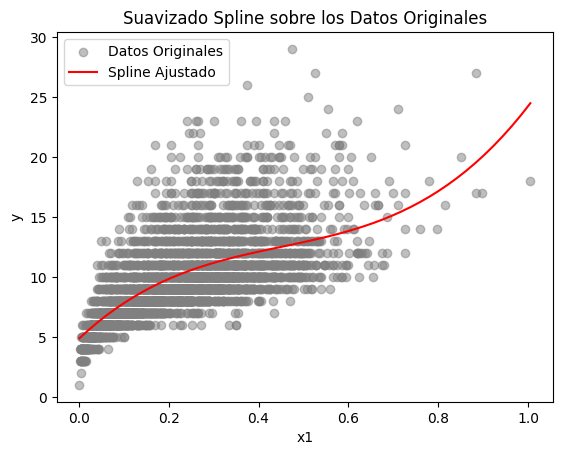

In [20]:
# Ordenar los datos originales para suavizar adecuadamente
sorted_indices = np.argsort(x1)
x1_sorted = x1[sorted_indices]
y3_sorted = y[sorted_indices]

# Ajuste Spline de Suavizado sobre los Datos Originales
spline = UnivariateSpline(x1_sorted, y3_sorted, s=50000)

x_plot = np.linspace(min(x1_sorted), max(x1_sorted), 50)
plt.figure()
plt.scatter(x1, y, color='gray', alpha=0.5, label='Datos Originales')
plt.plot(x_plot, spline(x_plot), color='red', label='Spline Ajustado')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.title('Suavizado Spline sobre los Datos Originales')
plt.show()

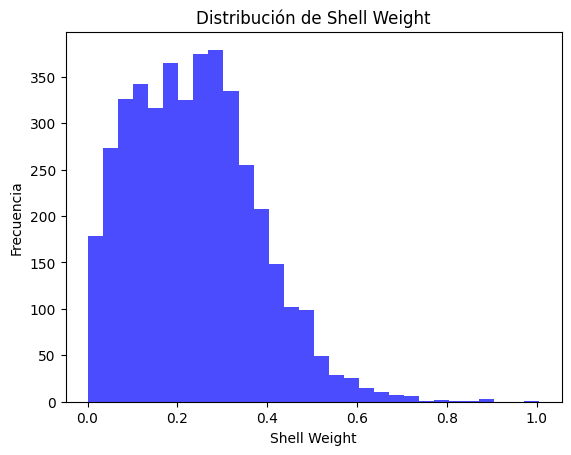

In [21]:
plt.hist(x1, bins=30, color='blue', alpha=0.7)
plt.xlabel('Shell Weight')
plt.ylabel('Frecuencia')
plt.title('Distribución de Shell Weight')
plt.show()

Como vemos los valores están muy concentrados, incluso repitiendose por lo cual, se le agregará un ruido uy pequeño a los datos y se realizará una transformación buscando que el spline pueda representar de mejor manera los datos.

### Transformando los datos

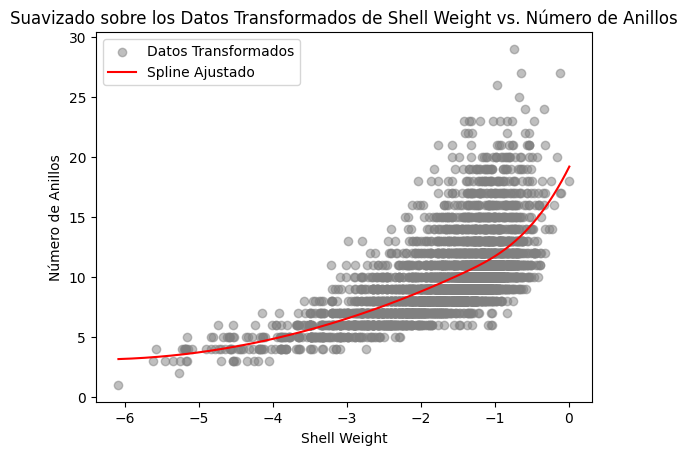

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Convertir la mejor variable predictora (Shell_weight) y la respuesta a numpy arrays
x1 = np.array(X['Shell_weight'])
y = np.array(y)

# Añadir un pequeño ruido para evitar problemas con valores repetidos o ceros
ruido_pequeño = np.random.uniform(0, 0.001, size=len(x1))

# Transformar la variable Shell Weight para reducir el sesgo
x1_transformed = np.log(x1 + ruido_pequeño)  # log(1 + x1 + ruido)
#x1_transformed = x1

# Ordenar los datos transformados para suavizar adecuadamente
sorted_indices = np.argsort(x1_transformed)
x1_sorted = x1_transformed[sorted_indices]
y_sorted = y[sorted_indices]

# Ajuste Spline de Suavizado sobre los Datos Transformados con un nivel de suavizado mayor
spline = UnivariateSpline(x1_sorted, y_sorted, s=25000)  # Aumentar el valor de s para suavizar más

# Graficar los puntos originales y el spline ajustado
x_plot = np.linspace(min(x1_transformed), max(x1_transformed), 1000)  # Valores para graficar spline de manera suave
plt.figure()
plt.scatter(x1_transformed, y, color='gray', alpha=0.5, label='Datos Transformados')  # Datos transformados
plt.plot(x_plot, spline(x_plot), color='red', label='Spline Ajustado')  # Spline ajustado
plt.xlabel('Shell Weight')
plt.ylabel('Número de Anillos')
plt.legend()
plt.title('Suavizado sobre los Datos Transformados de Shell Weight vs. Número de Anillos')
plt.show()


In [23]:
spline.get_coeffs()

array([ 3.15600483,  3.40941701,  6.58498371, 13.21995106, 19.21514748])

### Cálculo del Intervalo de Confianza
Remuestreo: Para calcular el intervalo de confianza, el enfoque de remuestreo es adecuado. Puedes usar un método como bootstrapping:
Realiza un remuestreo con reemplazo del conjunto de datos para generar varias muestras (por ejemplo, 1000 muestras).
Ajusta un suavizado spline para cada muestra.
Obtén una distribución para los valores ajustados (o las predicciones) y calcula el intervalo de confianza al 95%.
Gráfica de Curvas: Generar las curvas suavizadas para cada muestra y graficarlas juntas es una buena idea para visualizar la variabilidad del modelo. Esto te dará una representación visual del rango de incertidumbre de los suavizados.

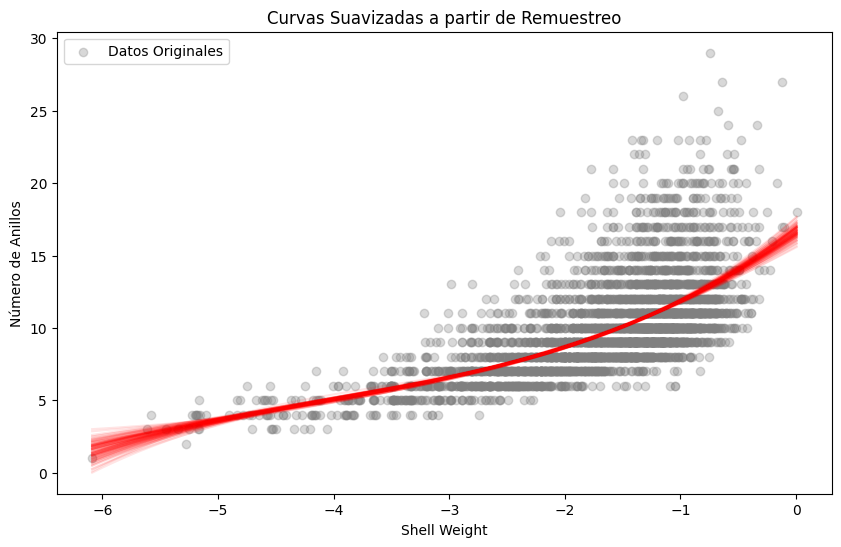

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import random

#x1 = np.array(X['Shell_weight'])
x1 = x1_transformed
y = np.array(y)

# Número de muestras de remuestreo
n_bootstrap = 100

x_plot = np.linspace(min(x1), max(x1), 1000)

plt.figure(figsize=(10, 6))
plt.scatter(x1, y, color='gray', alpha=0.3, label='Datos Originales')

# Remuestreo y ajuste del spline para cada muestra
for i in range(n_bootstrap):

    # Generar una muestra con reemplazo de los datos originales
    bootstrap_indices = np.random.choice(range(len(x1)), size=len(x1), replace=True)
    x1_bootstrap = x1[bootstrap_indices]
    y_bootstrap = y[bootstrap_indices]

    sorted_indices = np.argsort(x1_bootstrap)
    x1_sorted = x1_bootstrap[sorted_indices]
    y_sorted = y_bootstrap[sorted_indices]

    spline = UnivariateSpline(x1_sorted, y_sorted, s=30000)

    plt.plot(x_plot, spline(x_plot), color='red', alpha=0.1)

plt.xlabel('Shell Weight')
plt.ylabel('Número de Anillos')
plt.title('Curvas Suavizadas a partir de Remuestreo')
plt.legend()
plt.show()

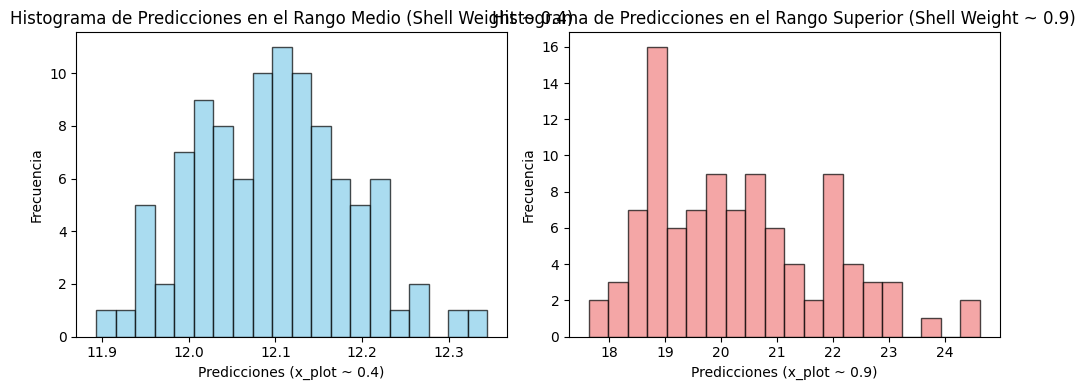

In [26]:
import matplotlib.pyplot as plt

# Seleccionar dos índices de x_plot: uno en el rango medio y otro en el extremo superior
index_middle = np.argmin(np.abs(x_plot - 0.4))
index_upper = np.argmin(np.abs(x_plot - 0.9))

# Extraer las predicciones para estos índices
predictions_middle = predictions[:, index_middle]
predictions_upper = predictions[:, index_upper]

# Graficar el histograma de las predicciones en el rango medio (x_plot ~ 0.4)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(predictions_middle, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Predicciones (x_plot ~ 0.4)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones en el Rango Medio (Shell Weight ~ 0.4)')

# Graficar el histograma de las predicciones en el rango superior (x_plot ~ 0.9)
plt.subplot(1, 2, 2)
plt.hist(predictions_upper, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel('Predicciones (x_plot ~ 0.9)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones en el Rango Superior (Shell Weight ~ 0.9)')

plt.tight_layout()
plt.show()
